In [23]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# Import data
data = pd.read_csv('/Users/megankelly/ASDA/Fish.csv')

In [8]:
# EDA
data.shape

(159, 7)

In [9]:
# Display the first entry
data.head(1)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.02


In [10]:
# Display the last entry
data.tail(1)

,Species,Weight,Length1,Length2,Length3,Height,Width
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [11]:
# Display a random sample of 7 entries
data.sample(7)

,Species,Weight,Length1,Length2,Length3,Height,Width
113,Perch,700.0,34.0,36.0,38.3,10.6091,6.7408
64,Parkki,120.0,17.5,19.0,21.3,8.3922,2.9181
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
135,Pike,510.0,40.0,42.5,45.5,6.8250,4.4590
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
133,Pike,345.0,36.0,38.5,41.0,6.3960,3.9770


In [12]:
# Check data types
data.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [13]:
# basic summary statistics for numeric data
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [14]:
# basic summary statistics for categorical data
data.describe(include="object")

,Species
count,159
unique,7
top,Perch
freq,56


In [15]:
# Check duplicates
data.duplicated().sum()

np.int64(0)

In [16]:
# Check missing values
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [ ]:
# examples
def format_example_values(series):
    vals = series.dropna().unique()[:5]
    
    formatted = []
    for v in vals:
        if isinstance(v, (int, float, np.number)):
            formatted.append(f"{v:.2f}")
        else:
            formatted.append(str(v))
    return ", ".join(formatted)

summary_df = pd.DataFrame({
    "Feature/variable": data.columns,
    "Data type": data.dtypes.values.astype(str),
    #"Description": [""] * len(data.columns),
    "Number of Unique values": [data[col].nunique() for col in data.columns],
    "Example values": [format_example_values(data[col]) for col in data.columns]
})

# Show all rows without truncation
with pd.option_context("display.max_rows", None, "display.max_colwidth", None):
    print(summary_df.to_markdown(index=False))


| Feature/variable   | Data type   |   Number of Unique values | Example values                         |
|:-------------------|:------------|--------------------------:|:---------------------------------------|
| Species            | object      |                         7 | Bream, Roach, Whitefish, Parkki, Perch |
| Weight             | float64     |                       101 | 242.00, 290.00, 340.00, 363.00, 430.00 |
| Length1            | float64     |                       116 | 23.20, 24.00, 23.90, 26.30, 26.50      |
| Length2            | float64     |                        93 | 25.40, 26.30, 26.50, 29.00, 29.70      |
| Length3            | float64     |                       124 | 30.00, 31.20, 31.10, 33.50, 34.00      |
| Height             | float64     |                       154 | 11.52, 12.48, 12.38, 12.73, 12.44      |
| Width              | float64     |                       152 | 4.02, 4.31, 4.70, 4.46, 5.13           |


In [19]:
# basic summary statistics for numerical variables
# Select only numeric columns
num_df = data.select_dtypes(include="number")

# Compute descriptive statistics
summary_table = num_df.describe().loc[
    ["count", "mean", "std", "min", "25%", "50%", "75%", "max"]
]

# Optional: round to 2 decimals
summary_table = summary_table.round(2)

summary_table = summary_table.T

print(summary_table.to_markdown())

|         |   count |   mean |    std |   min |    25% |    50% |    75% |     max |
|:--------|--------:|-------:|-------:|------:|-------:|-------:|-------:|--------:|
| Weight  |     159 | 398.33 | 357.98 |  0    | 120    | 273    | 650    | 1650    |
| Length1 |     159 |  26.25 |  10    |  7.5  |  19.05 |  25.2  |  32.7  |   59    |
| Length2 |     159 |  28.42 |  10.72 |  8.4  |  21    |  27.3  |  35.5  |   63.4  |
| Length3 |     159 |  31.23 |  11.61 |  8.8  |  23.15 |  29.4  |  39.65 |   68    |
| Height  |     159 |   8.97 |   4.29 |  1.73 |   5.94 |   7.79 |  12.37 |   18.96 |
| Width   |     159 |   4.42 |   1.69 |  1.05 |   3.39 |   4.25 |   5.58 |    8.14 |


In [20]:
# basic summary statistics for categorical variables
# Select categorical/object columns
cat_df = data.select_dtypes(include=["object", "category"])

summary = pd.DataFrame(index=cat_df.columns)

# Count of non-missing values
summary["Count"] = cat_df.count()

# Number of unique values
summary["Number of unique values"] = cat_df.nunique()

# Most frequent value
summary["Most frequent value"] = cat_df.mode().iloc[0]

# Frequency of most frequent value
summary["Most frequent value (frequency)"] = [
    cat_df[col].value_counts().iloc[0] if cat_df[col].nunique() > 0 else 0
    for col in cat_df.columns
]

# Least frequent value
summary["Least frequent value"] = [
    cat_df[col].value_counts().idxmin() if cat_df[col].nunique() > 0 else None
    for col in cat_df.columns
]

# Frequency of least frequent value
summary["Least frequent value (frequency)"] = [
    cat_df[col].value_counts().iloc[-1] if cat_df[col].nunique() > 0 else 0
    for col in cat_df.columns
]

# Flip rows and columns
summary = summary.T

print(summary.to_markdown())

|                                  | Species   |
|:---------------------------------|:----------|
| Count                            | 159       |
| Number of unique values          | 7         |
| Most frequent value              | Perch     |
| Most frequent value (frequency)  | 56        |
| Least frequent value             | Whitefish |
| Least frequent value (frequency) | 6         |


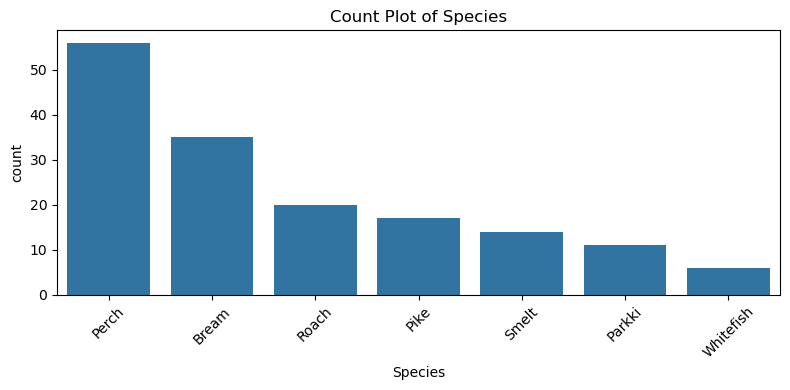

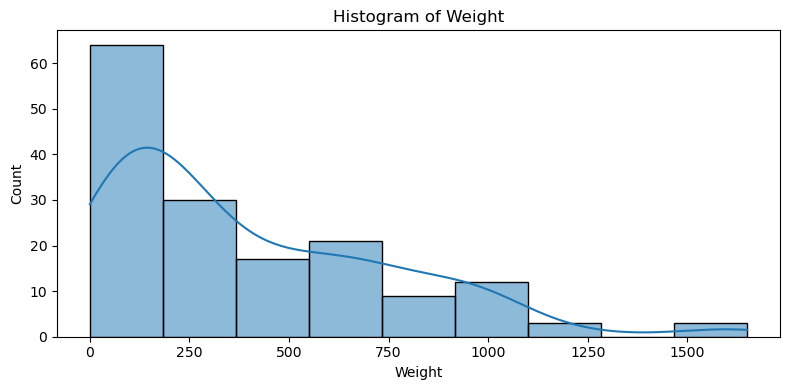

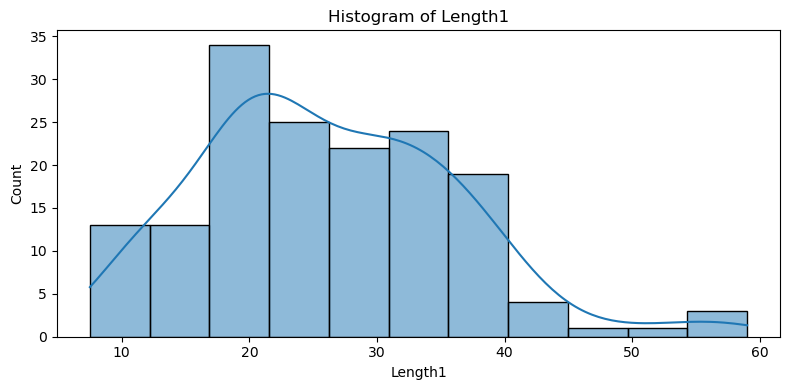

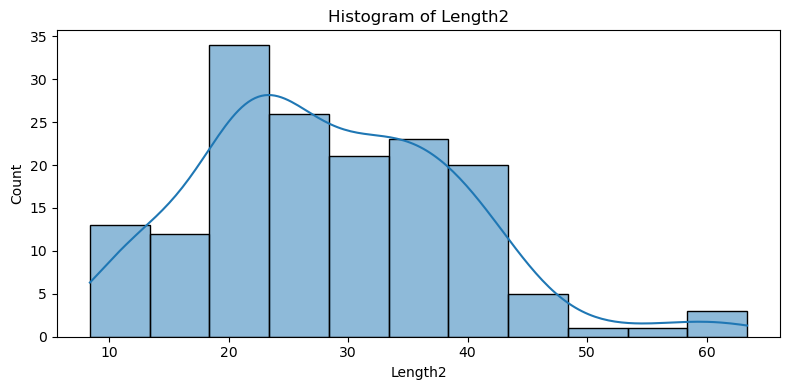

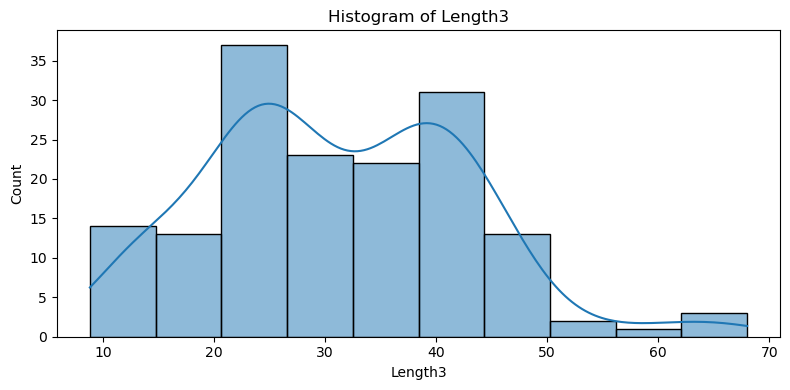

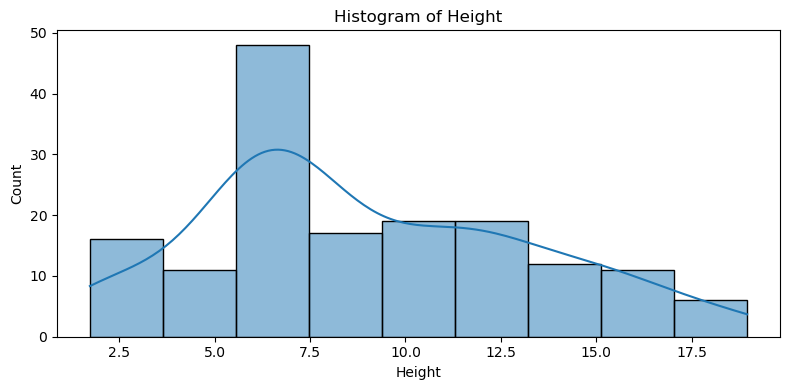

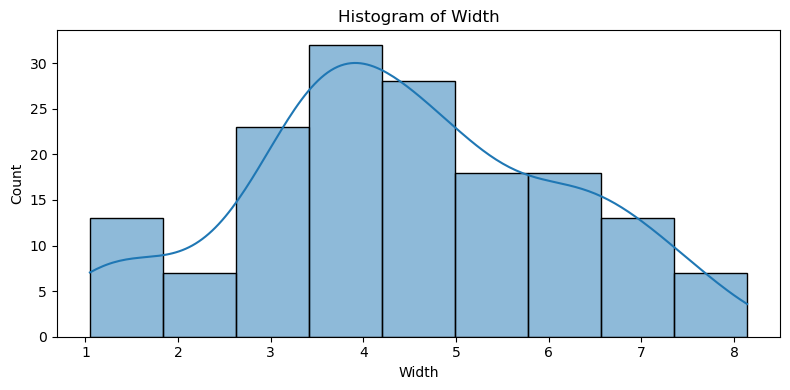

In [21]:
# basic plots for categorical and numerical variables to check distributions and counts (histogram, barplot)
for col in data.columns:
    plt.figure(figsize=(8, 4))
    if data[col].dtype in ['object', 'category']:
        sns.countplot(data=data, x=col, order=data[col].value_counts().index)
        plt.title(f'Count Plot of {col}')
        plt.xticks(rotation=45)
    else:
        sns.histplot(data=data, x=col, kde=True)
        plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()